## Please describe your task under this cell.

Business Unit Desc                              FacilityName  \
0       Calgary Comm Standards         INACTIVE - EC - UTILITY YARD - CM   
1       Calgary Comm Standards         INACTIVE - EC - UTILITY YARD - CM   
2       Calgary Comm Standards         INACTIVE - EC - UTILITY YARD - CM   
3       Calgary Comm Standards         INACTIVE - EC - UTILITY YARD - CM   
4       Calgary Comm Standards         INACTIVE - EC - UTILITY YARD - CM   
...                        ...                                       ...   
161303          Water Services  VALLEYFIELD WASTEWATER RECEIVING STATION   
161304          Water Services  VALLEYFIELD WASTEWATER RECEIVING STATION   
161305          Water Services  VALLEYFIELD WASTEWATER RECEIVING STATION   
161306          Water Services  VALLEYFIELD WASTEWATER RECEIVING STATION   
161307          Water Services  VALLEYFIELD WASTEWATER RECEIVING STATION   

              Site ID FacilityAddress Energy Description  Year Month  \
0       0020004409284   3030 68 ST SE        Electricity  2014   Jan   
1       0020004409284   3030 68 ST SE        Electricity  2014   Feb   
2       0020004409284   3030 68 ST SE        Electricity  2014   Mar   
3       0020004409284   3030 68 ST SE        Electricity  2014   Apr   
4       0020004409284   3030 68 ST SE        Electricity  2014   May   
...               ...             ...                ...   ...   ...   
161303  0003025408748   2315 49 AV SE        Natural Gas  2021   Mar   
161304  0003025408748   2315 49 AV SE        Natural Gas  2021   Apr   
161305  0003025408748   2315 49 AV SE        Natural Gas  2021   May   
161306  0003025408748   2315 49 AV SE        Natural Gas  2021   Jun   
161307  0003025408748   2315 49 AV SE        Natural Gas  2021   Jul   

        Total Consumption Unit  
0                  0.2268   GJ  
1                  0.2628   GJ  
2                  0.2448   GJ  
3                  0.1836   GJ  
4                  0.1224   GJ  
...                   ...  ...  
161303            36.0000   GJ  
161304            25.0000   GJ  
161305            18.0000   GJ  
161306             0.0000   GJ  
161307             1.0000   GJ  

[161308 rows x 9 columns]

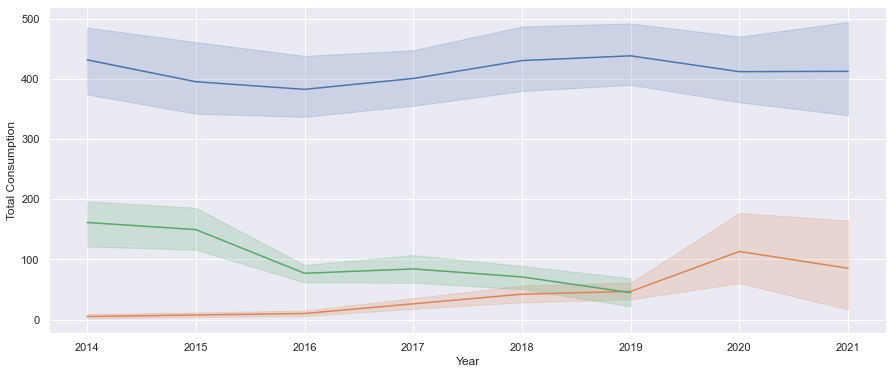

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
import plotly.express as px
import plotly.graph_objects as go

energydata = pd.read_csv("../dataset/Corporate_Energy_Consumption.csv", thousands=',')

def func(x):
    if(x['Unit'] == 'kWh'):
        x['Total Consumption'] = pd.to_numeric(x['Total Consumption'])*0.0036
        x['Unit'] = 'GJ'
        return x
    else:
        return x


energydata = energydata.apply(lambda x: func(x), axis=1)
display(energydata)

energyResourcesData = energydata[(energydata['Energy Description'] != 'Electricity') & (energydata['Energy Description'] != 'District Energy')& (energydata['Total Consumption'] != 0.0)]

newData = energydata.groupby(['Energy Description', 'Year']).sum()


disEnergyData = newData.loc['District Energy']
electricityData = newData.loc['Electricity']
ngData = newData.loc['Natural Gas']
seData = newData.loc['Solar Power']
stData = newData.loc['Solar Thermal']

fig = plt.figure()
fig.set_size_inches(15,6)

naturalGasConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Natural Gas']
solarEnergyConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Solar Power']
solarThermalConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Solar Thermal']

ngDataPlot = sns.lineplot(data=naturalGasConsumption, x="Year", y="Total Consumption")
seDataPlot = sns.lineplot(data=solarEnergyConsumption, x="Year", y="Total Consumption")
stDataPlot = sns.lineplot(data=solarThermalConsumption, x="Year", y="Total Consumption")

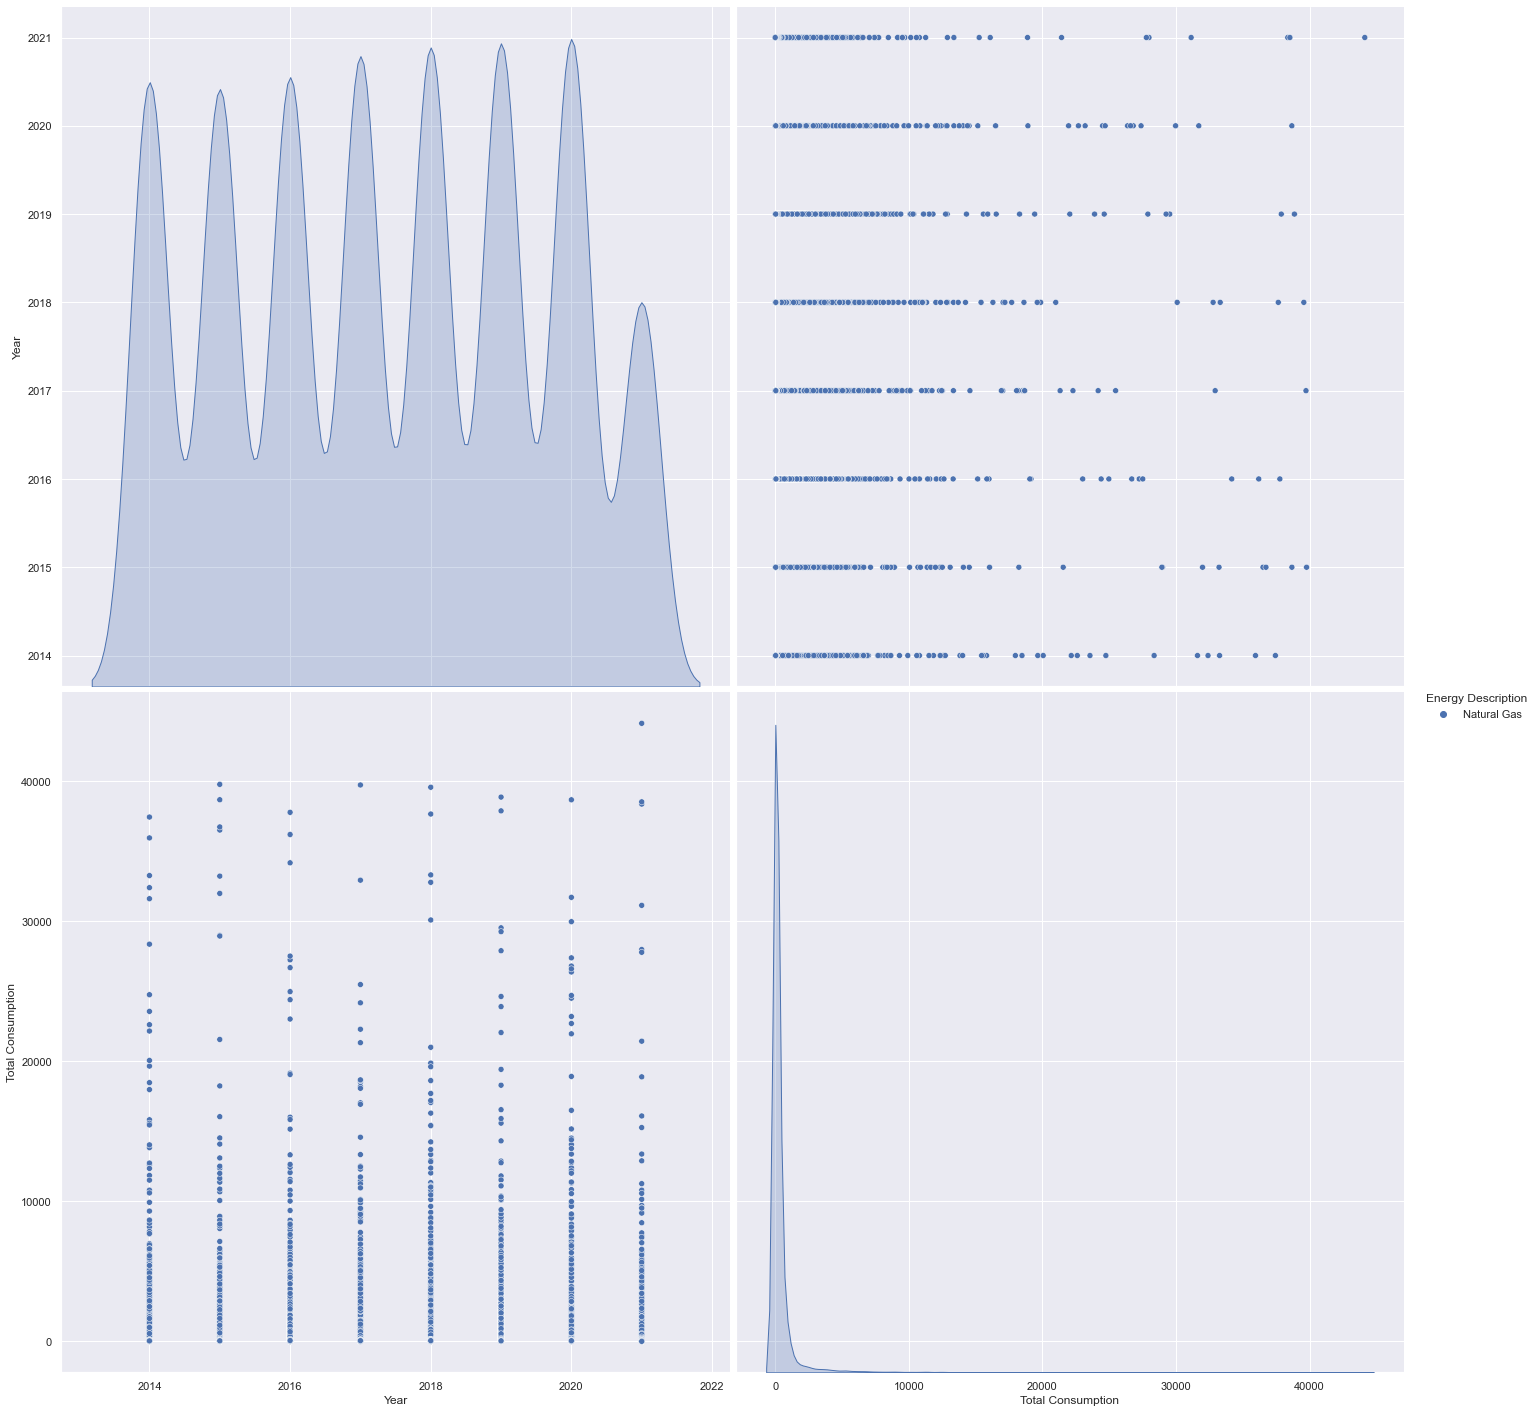

In [13]:
plots = sns.pairplot(naturalGasConsumption, hue='Energy Description', height=10);

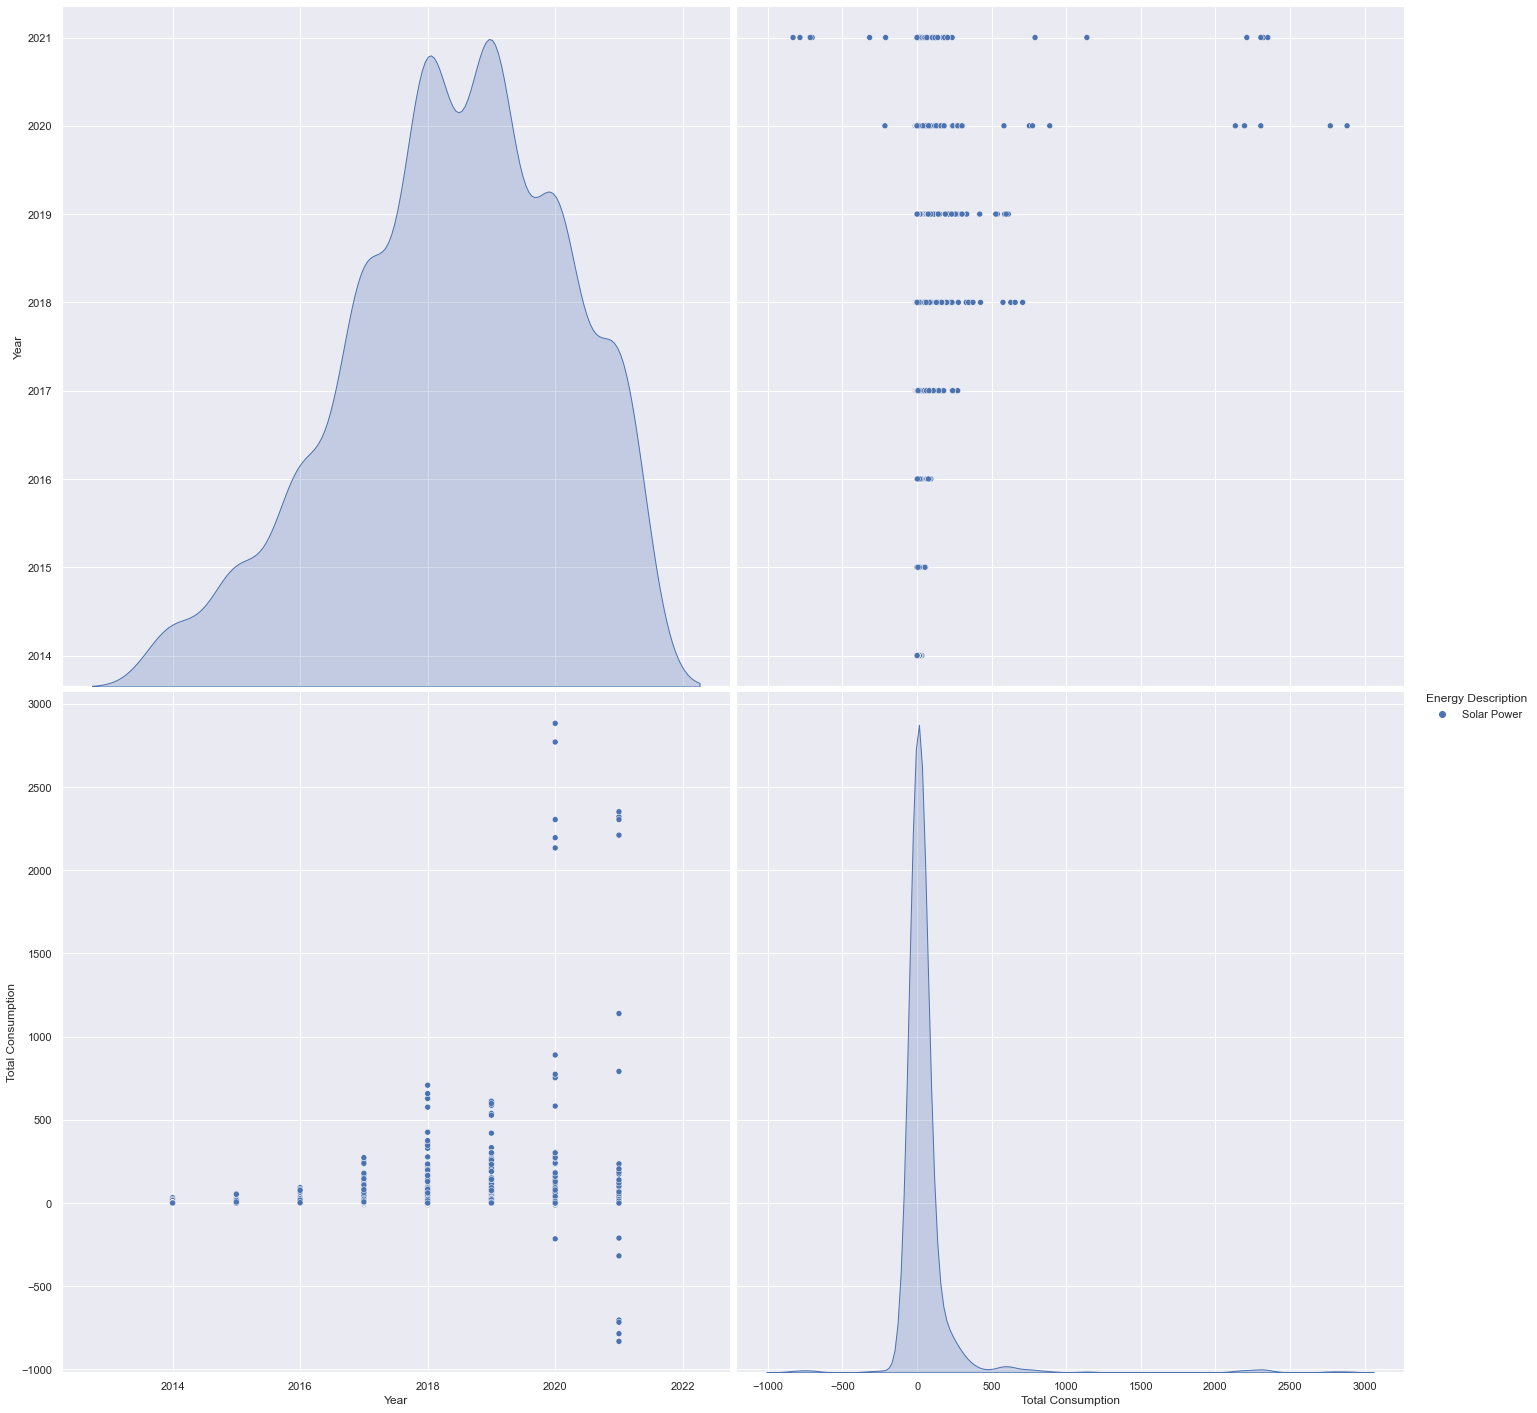

In [14]:
plots = sns.pairplot(solarEnergyConsumption, hue='Energy Description', height=10);

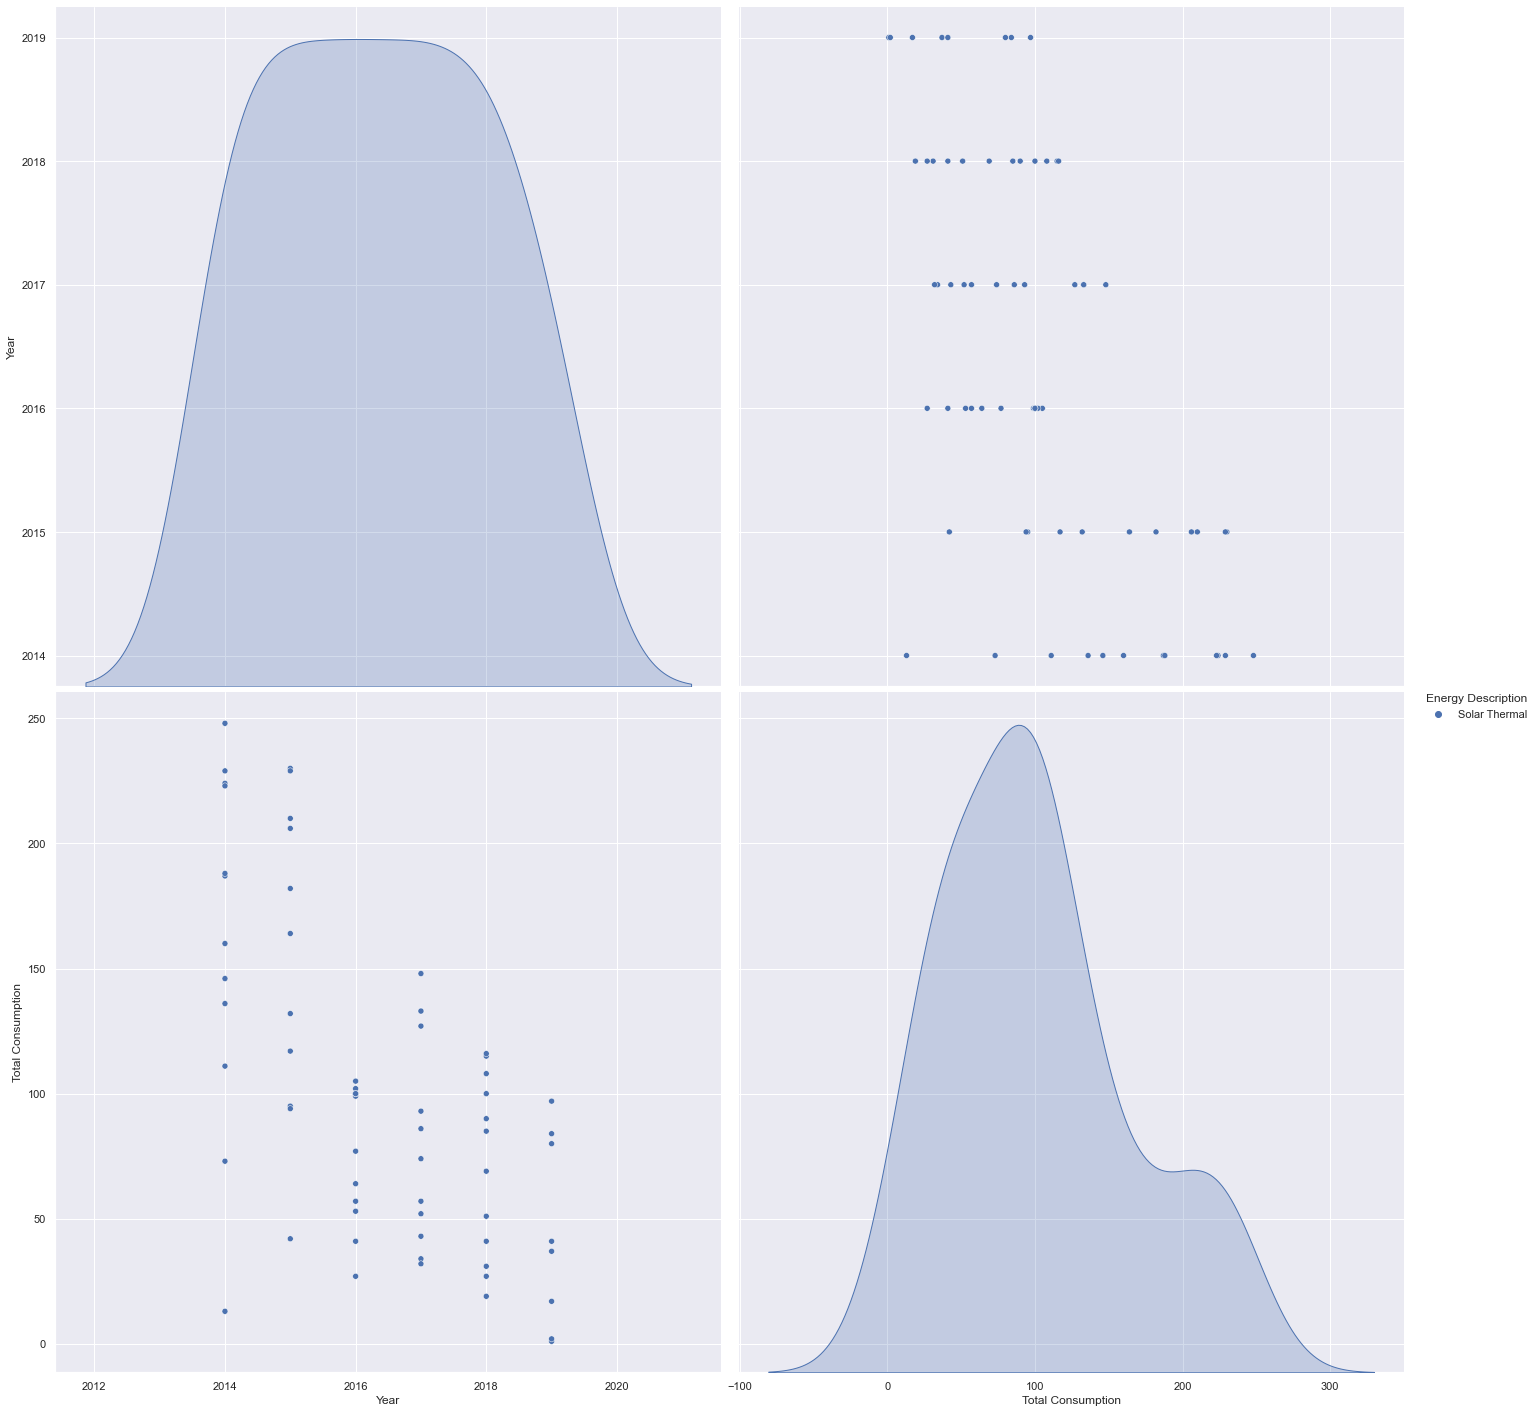

In [15]:
plots = sns.pairplot(solarThermalConsumption, hue='Energy Description', height=10);

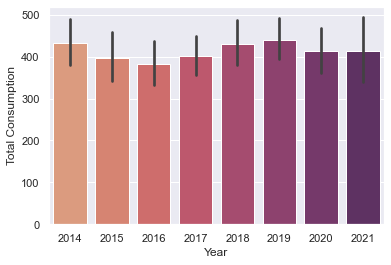

In [16]:
plot = sns.barplot(data=naturalGasConsumption, x="Year", y="Total Consumption", palette="flare")

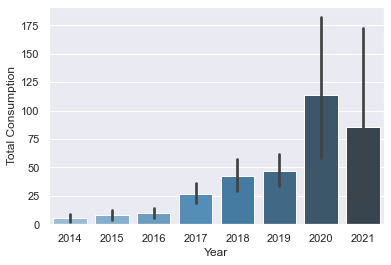

In [17]:
plot = sns.barplot(data=solarEnergyConsumption, x="Year", y="Total Consumption", palette="Blues_d")

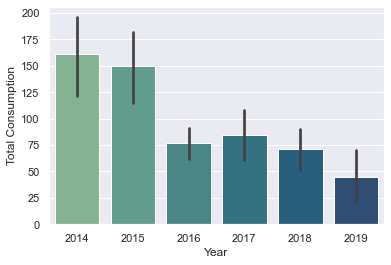

In [18]:
plot = sns.barplot(data=solarThermalConsumption, x="Year", y="Total Consumption", palette="crest")

===== Non Renewable Energy (Electricity & Natural Gas) ========


Total Consumption
Year                   
2014       3.583436e+06
2015       3.364074e+06
2016       3.294217e+06
2017       3.416959e+06
2018       3.618689e+06
2019       3.629713e+06
2020       3.407248e+06
2021       1.987246e+06

===== Renewable Energy (Solar Power & Solar Thermal)  ========


Total Consumption
Year                   
2014          2059.1508
2015          2137.5248
2016          1743.1540
2017          5094.7528
2018         10884.8364
2019         11766.6296
2020         20505.6720
2021         10937.8764

<AxesSubplot:xlabel='Year'>

<Figure size 1080x432 with 0 Axes>

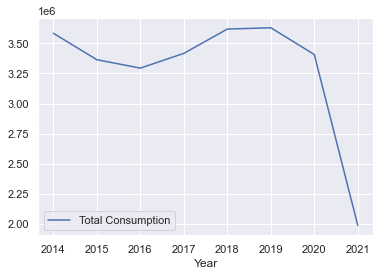

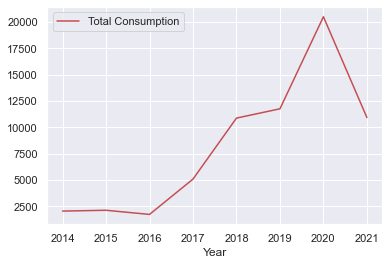

In [6]:

non_renewable_energy= energydata[(energydata['Energy Description'] == 'Electricity') | (energydata['Energy Description'] == 'Natural Gas')].groupby(['Year']).sum()
renewable_energy= energydata[(energydata['Energy Description'] == 'Solar Power') | (energydata['Energy Description'] == 'Solar Thermal')].groupby(['Year']).sum()

print("===== Non Renewable Energy (Electricity & Natural Gas) ========")
display(non_renewable_energy)
print("===== Renewable Energy (Solar Power & Solar Thermal)  ========")
display(renewable_energy)

fig = plt.figure()
fig.set_size_inches(15,6)

non_renewable_energy.plot(kind='line', color='b', grid=True)
renewable_energy.plot(kind='line', color='r', grid=True)

## Please describe your task under this cell.

In [7]:
fields = ['date', 'max_temperature', 'avg_hourly_temperature', 'avg_temperature']
weatherdata = pd.read_csv("../weatherstats_calgary_daily.csv", skipinitialspace=True, usecols=fields)
display(weatherdata)

FileNotFoundError: [Errno 2] No such file or directory: '../weatherstats_calgary_daily.csv'

## Please describe your task under cell.

In [ ]:
weatherdata.date=pd.to_datetime(weatherdata.date)

In [ ]:
#tempData.head()
yseries = weatherdata['date'].dt.year
mseries = weatherdata['date'].dt.month
dseries = weatherdata['date'].dt.day
tempData = pd.DataFrame({'Date':weatherdata['date'],'Year': yseries,'Month': mseries ,'max_temperature':weatherdata['max_temperature'], 'avg_hourly_temperature':weatherdata['avg_hourly_temperature'], 'avg_temperature':weatherdata['avg_temperature']})
selectedData=tempData[(tempData['max_temperature'] > 30) & (tempData['Year'] >= 1980)]
number_of_hottest_daysInYears=selectedData.groupby(['Year']).agg(count = ('max_temperature','count'))
fig = plt.figure()
fig.set_size_inches(20,6)

number_of_hottest_daysInYears.plot(kind='bar',figsize=(20,3))

meanData=tempData[(tempData['Year'] >= 1980)].groupby(['Year']).agg(mean = ('avg_temperature','median'))
#print(meanData)
meanData.plot(kind='line',figsize=(20,3))

summerData=tempData[(tempData['Year'] >= 1980) & (tempData['Month'] >= 7) & (tempData['Month'] <= 9)]
summerMeanData=summerData.groupby(['Year']).agg(mean = ('max_temperature','median'))
#print(summerMeanData)
summerMeanData.plot(kind='line',figsize=(20,3))

winterData=tempData[(tempData['Year'] >= 1990) & (tempData['Month'] >= 12) & (tempData['Month'] <= 2)]
winterMeanData=winterData.groupby(['Year']).agg(mean = ('max_temperature','mean'))
#print(winterMeanData)
winterMeanData.plot(kind='line',figsize=(20,3))

## Please describe your task under cell.
In the end we will sum up different corporates and facilities energy consumption trends over the year and what’s their main source of resource of energy?

In [ ]:
for col in energydata.columns:
    print(col + ": " + str(energydata[col].dtype))

In [ ]:
df = pd.DataFrame(energydata,columns=["Business Unit Desc","FacilityName","Site ID", "FacilityAddress","Energy Description",
                                 "Year","Month","Total Consumption","Unit"])
df1=pd.DataFrame.drop(energydata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df1 = df1.loc[df1['Energy Description'] == 'Electricity']
df1=df1.loc[df1['Total Consumption'] >= 0]
df1=df1.loc[df1['Year'].between(2014,2021)]
df1= df1.groupby(pd.PeriodIndex(df1['Year'], freq="Y"))['Total Consumption'].sum()
df1.name = "Electricity Usage of each Year "
fig = plt.figure()
df1.plot(kind='bar', color='r', grid=True)
fig.set_size_inches(15,6)
plt.legend();
plt.show()


df2=pd.DataFrame.drop(energydata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2 =df2.loc[df2['Total Consumption'] >= 0]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2= df2.groupby(pd.PeriodIndex(df2['Year'], freq="Y"))['Total Consumption'].sum()
df2.name = "Natual Gas Usage of each Year "
fig = plt.figure()
df2.plot(kind='bar', color='b', grid=True)
fig.set_size_inches(15,6)
plt.legend();
plt.show()



df3=pd.DataFrame.drop(energydata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3=df3.loc[df3['Total Consumption'] >= 0]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3= df3.groupby(pd.PeriodIndex(df3['Year'], freq="Y"))['Total Consumption'].sum()
df3.name = "Solar Power Usage of each Year "
fig = plt.figure()
df3.plot(kind='bar', color='y', grid=True)
fig.set_size_inches(15,6)
plt.legend();
plt.show()


df4=pd.DataFrame.drop(energydata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df4 = df4.loc[df4['Energy Description'] == 'District Energy']
df4=df4.loc[df4['Total Consumption'] >= 0]
df4=df4.loc[df4['Year'].between(2014,2021)]   
df4= df4.groupby(pd.PeriodIndex(df4['Year'], freq="Y"))['Total Consumption'].sum()
df4.name = "District Energy Usage of each Year "
fig = plt.figure()
df4.plot(kind='bar', color='g', grid=True)
fig.set_size_inches(15,6)
plt.legend();
plt.show()